<a href="https://colab.research.google.com/github/gmuniz2/Airbnb_analysis-/blob/main/Airbnb_Chicago_Listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AirBnb Listing in Chicago, IL

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pd.set_option('display.max_columns', 50)

In [2]:
df_Chi_Airbnb= pd.read_csv('https://raw.githubusercontent.com/gmuniz2/Airbnb_analysis-/main/chicago-airbnb-listings.csv')

**Displaying the first 5 rows of the data set**

In [3]:
df_Chi_Airbnb.head()

name   neighbourhood  \
0  Hyde Park - Walk to UChicago, 10 min to McCormick       Hyde Park   
1  394 Great Reviews. 127 y/o House. 40 yds to tr...  South Lawndale   
2                Tiny Studio Apartment 94 Walk Score       West Town   
3                      Barbara's Hideaway - Old Town    Lincoln Park   
4                              The Biddle House (#1)    Lincoln Park   

         room_type  bedrooms  bathrooms  accommodates  minimum_nights  price  \
0     Private room       1.0        1.0             1               2   65.0   
1  Entire home/apt       3.0        1.0             7               2  117.0   
2  Entire home/apt       3.0        1.0             2               2   70.0   
3  Entire home/apt       1.0        1.0             4               4   95.0   
4  Entire home/apt       2.0        1.0             4               4  125.0   

   availability_365  number_of_reviews  review_score  latitude  longitude  \
0               355                181         100.0  41.78790  -87.58780   
1               184                395          96.0  41.85495  -87.69696   
2               365                389          93.0  41.90289  -87.68182   
3               282                 54          93.0  41.91769  -87.63788   
4               101                 21          90.0  41.91183  -87.64000   

   is_superhost  
0             1  
1             1  
2             1  
3             1  
4             1

**Displaying the last 5 rows**

In [4]:
df_Chi_Airbnb.tail()

name    neighbourhood  \
3212  Kasa Chicago | Pet Friendly 2BD/2BA + Balcony ...             Loop   
3213  Kasa Chicago | Family Friendly 3BD/2BA + Free ...             Loop   
3214         Penthouse Downtown River North - Sleeps 13  Near North Side   
3215    Unique classic private home 🏠 amazing location!        West Town   
3216  Indulging 2-Bedroom Condo Unit in Festive Boys...        Lake View   

            room_type  bedrooms  bathrooms  accommodates  minimum_nights  \
3212  Entire home/apt       2.0        2.0             6               4   
3213  Entire home/apt       3.0        2.0             6               4   
3214  Entire home/apt       3.0        2.0            13               2   
3215  Entire home/apt       3.0        2.0             8               2   
3216  Entire home/apt       2.0        1.0             4               2   

      price  availability_365  number_of_reviews  review_score  latitude  \
3212  127.0               357                 23          97.0  41.87098   
3213  200.0               357                 10          86.0  41.86941   
3214  140.0               327                 13          91.0  41.89772   
3215  117.0                 0                 10          84.0  41.89413   
3216   65.0               345                 11          96.0  41.94246   

      longitude  is_superhost  
3212  -87.63046             0  
3213  -87.63214             0  
3214  -87.63832             0  
3215  -87.67549             0  
3216  -87.64572             0

**Showing ramndomly sampled 20 rows of the dataset**

In [5]:
df_Chi_Airbnb.sample(20)

name    neighbourhood  \
3050              3 bedroom condo minutes from Downtown        West Town   
1260    Inviting 4 Bedroom Duplex Next to Humboldt Park        West Town   
1216    Entire 2 bed/2 bath condo VERY close to Wrigley        Lake View   
2092  Beautiful 2BR overlooking park, 3 mi from down...       Bridgeport   
1876                              Little Village studio   South Lawndale   
1754        Full size bed in private monster theme room     Logan Square   
2917     A Stylish, sundrenched Chicago Ravenswood Flat        Lake View   
260                  Lovely First Floor Flat with Piano        West Town   
623             5min walk to UnivOfChicago. MODERN LUXE         Woodlawn   
2074   Opulent 3bdr2bth Old Town Luxury + Parking prmts     Lincoln Park   
1772                                The Big Lindmarkski     Portage Park   
2180  Wicker Park- Private Room & Bath in Beautiful ...        West Town   
1799   Luxury Private Bedroom in Chicago - Free Parking      Forest Glen   
670                   Charm on the park, fully upgraded        Lake View   
2269                         chicago lakeside apartment        Edgewater   
2565          MONTHLY DISCOUNT #5 2bd/2ba +GYM Downtown  Near South Side   
1931  McCormick's  Place Across Street, 2 free parkings  Near South Side   
3054  The En Bronze ~ 7mins To Dining & Downtown Chi...  Grand Boulevard   
2783            🔝🔝Best place to B!! Free street parking        West Town   
668                 Charming Andersonville Neighborhood        Edgewater   

            room_type  bedrooms  bathrooms  accommodates  minimum_nights  \
3050  Entire home/apt       3.0        1.0             5               3   
1260  Entire home/apt       4.0        2.0             9               1   
1216  Entire home/apt       2.0        2.0             4               1   
2092  Entire home/apt       2.0        1.0             6               6   
1876  Entire home/apt       1.0        1.0             2               1   
1754     Private room       1.0        1.0             2               2   
2917  Entire home/apt       3.0        1.0             6               1   
260   Entire home/apt       2.0        3.0             4               3   
623      Private room       1.0        2.0             2               4   
2074  Entire home/apt       3.0        2.0             4               2   
1772  Entire home/apt       1.0        1.0             5               2   
2180     Private room       1.0        1.0             2               1   
1799     Private room       1.0        1.0             2               1   
670   Entire home/apt       2.0        1.0             5               5   
2269  Entire home/apt       1.0        1.0             4               5   
2565  Entire home/apt       2.0        2.0             7               2   
1931  Entire home/apt       3.0        3.0             7               3   
3054  Entire home/apt       3.0        2.0             8               2   
2783  Entire home/apt       3.0        2.0             8               2   
668   Entire home/apt       2.0        1.0             6               1   

      price  availability_365  number_of_reviews  review_score  latitude  \
3050   95.0               124                 25          98.0  41.90204   
1260  132.0               312                 94          97.0  41.90376   
1216   84.0                 0                 22          99.0  41.94531   
2092   65.0                69                105         100.0  41.83999   
1876   45.0                44                147          90.0  41.84942   
1754   45.0               355                 49         100.0  41.92148   
2917  129.0               350                 37          99.0  41.95378   
260   399.0               179                 31          98.0  41.89783   
623    32.0               343                 91          91.0  41.78339   
2074  429.0               350                 27         100.0  41.91274   
1772  106.0          

Show the datatypes of each **columns**

In [6]:
df_Chi_Airbnb.info()
#dataframe summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217 entries, 0 to 3216
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3217 non-null   object 
 1   neighbourhood      3217 non-null   object 
 2   room_type          3217 non-null   object 
 3   bedrooms           3217 non-null   float64
 4   bathrooms          3217 non-null   float64
 5   accommodates       3217 non-null   int64  
 6   minimum_nights     3217 non-null   int64  
 7   price              3217 non-null   float64
 8   availability_365   3217 non-null   int64  
 9   number_of_reviews  3217 non-null   int64  
 10  review_score       3217 non-null   float64
 11  latitude           3217 non-null   float64
 12  longitude          3217 non-null   float64
 13  is_superhost       3217 non-null   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 352.0+ KB


In [7]:
num_rows = df_Chi_Airbnb.shape[0]
num_cols = df_Chi_Airbnb.shape[1]
print(num_rows, num_cols)

3217 14


Displaying the average availabilty of Airbnbs in **Chicago**

In [8]:
Avg_availability = df_Chi_Airbnb['availability_365'].mean()
#find average number on Airbnb availabiltiy 
print(f'The Average availability in Chicago is {round(Avg_availability)}.')

The Average availability in Chicago is 171.


This shows the Airbnbs that are above avg

In [9]:
Above_average = df_Chi_Airbnb[(df_Chi_Airbnb['availability_365'] >= 171)]
display(Above_average)
#1538 airbnbs in chicago are above average this aorunf 48%

name    neighbourhood  \
0     Hyde Park - Walk to UChicago, 10 min to McCormick        Hyde Park   
1     394 Great Reviews. 127 y/o House. 40 yds to tr...   South Lawndale   
2                   Tiny Studio Apartment 94 Walk Score        West Town   
3                         Barbara's Hideaway - Old Town     Lincoln Park   
5     Private Apt 1 Block to Fullerton L Red Line - ...     Lincoln Park   
...                                                 ...              ...   
3211  Kasa Chicago | Free Parking! Remote Work 1BD/1...             Loop   
3212  Kasa Chicago | Pet Friendly 2BD/2BA + Balcony ...             Loop   
3213  Kasa Chicago | Family Friendly 3BD/2BA + Free ...             Loop   
3214         Penthouse Downtown River North - Sleeps 13  Near North Side   
3216  Indulging 2-Bedroom Condo Unit in Festive Boys...        Lake View   

            room_type  bedrooms  bathrooms  accommodates  minimum_nights  \
0        Private room       1.0        1.0             1               2   
1     Entire home/apt       3.0        1.0             7               2   
2     Entire home/apt       3.0        1.0             2               2   
3     Entire home/apt       1.0        1.0             4               4   
5     Entire home/apt       1.0        1.0             3              32   
...               ...       ...        ...           ...             ...   
3211  Entire home/apt       1.0        1.0             4               4   
3212  Entire home/apt       2.0        2.0             6               4   
3213  Entire home/apt       3.0        2.0             6               4   
3214  Entire home/apt       3.0        2.0            13               2   
3216  Entire home/apt       2.0        1.0             4               2   

      price  availability_365  number_of_reviews  review_score  latitude  \
0      65.0               355                181         100.0  41.78790   
1     117.0               184                395          96.0  41.85495   
2      70.0               365                389          93.0  41.90289   
3      95.0               282                 54          93.0  41.91769   
5      77.0               171                 37          85.0  41.92679   
...     ...               ...                ...           ...       ...   
3211  100.0               365                 13          92.0  41.86932   
3212  127.0               357                 23          97.0  41.87098   
3213  200.0               357                 10          86.0  41.86941   
3214  140.0               327                 13          91.0  41.89772   
3216   65.0               345                 11          96.0  41.94246   

      longitude  is_superhost  
0     -87.58780             1  
1     -87.69696             1  
2     -87.68182             1  
3     -87.63788             1  
5     -87.65521             0  
...         ...           ...  
3211  -87.63195             0  
3212  -87.63046             0  
3213  -87.63214             0  
3214  -87.63832             0  
3216  -87.64572             0  

[1538 rows x 14 columns]

**Displaying the total review by neighborhood. This will show the neighborhoods that are known to have great airbnb**

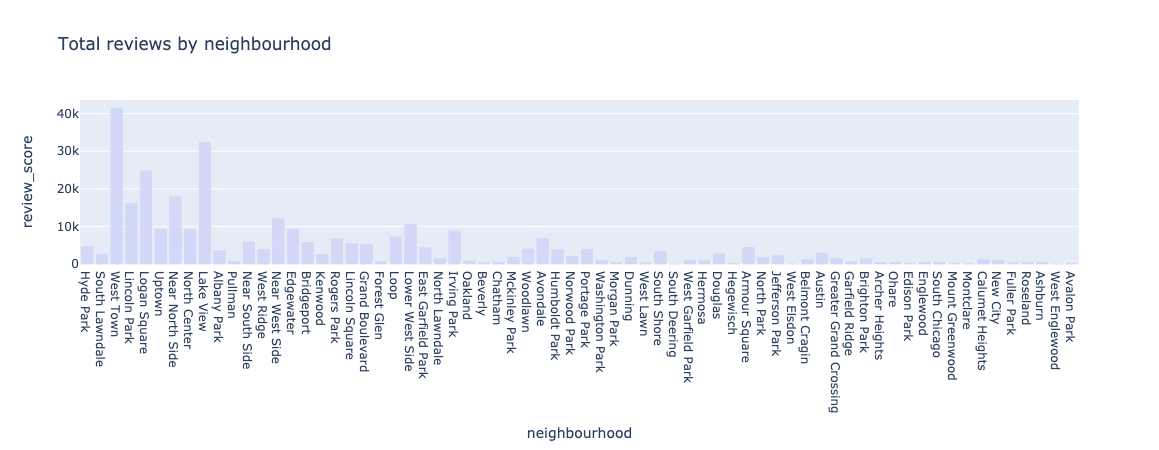

In [10]:
fig = px.bar(df_Chi_Airbnb, x = 'neighbourhood', y = 'review_score', title = 'Total reviews by neighbourhood')
fig.show()

**Displaying the review score by availability. This shows the airbnbs with avialability under 49 typically have the higher abount of reviews**

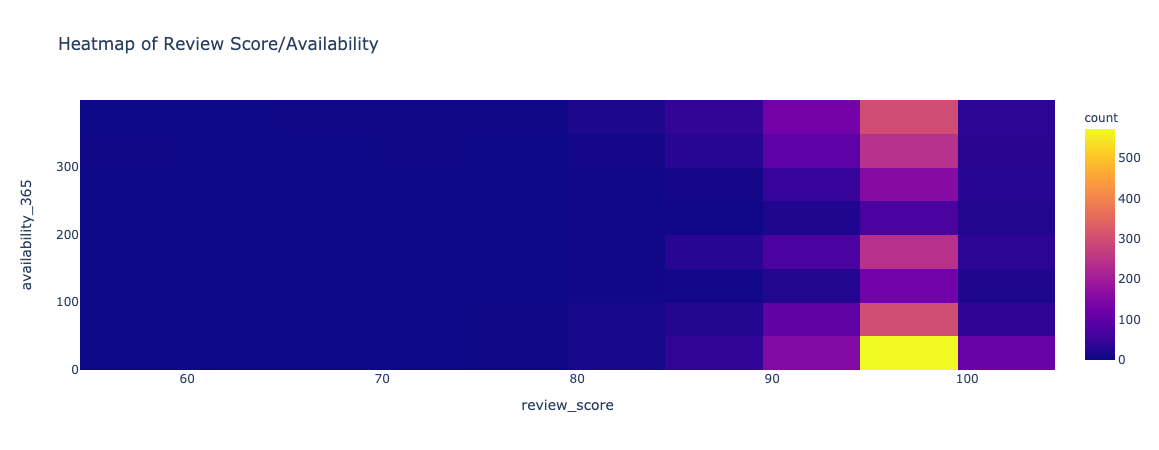

In [11]:
fig = px.density_heatmap(df_Chi_Airbnb, x='review_score',y='availability_365', title='Heatmap of Review Score/Availability',nbinsx=20)
fig.show()

**This displays how airbnbs in different neighborhoods vary by score, price, and availability**

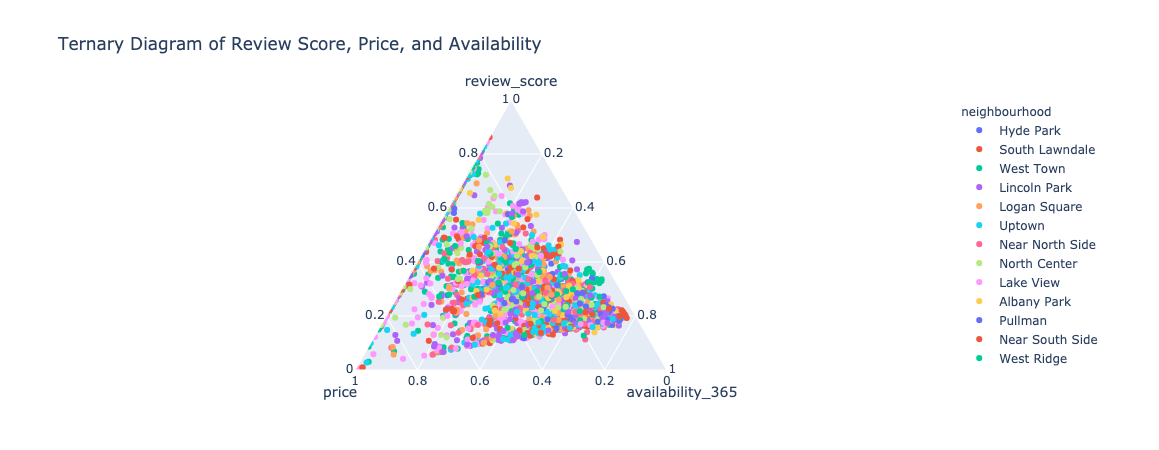

In [12]:
fig = px.scatter_ternary(df_Chi_Airbnb, a='review_score',b='price',c='availability_365', color='neighbourhood', title='Ternary Diagram of Review Score, Price, and Availability')
fig.show()

**This shows the amount of bathrooms per bedroom in airbnbs**

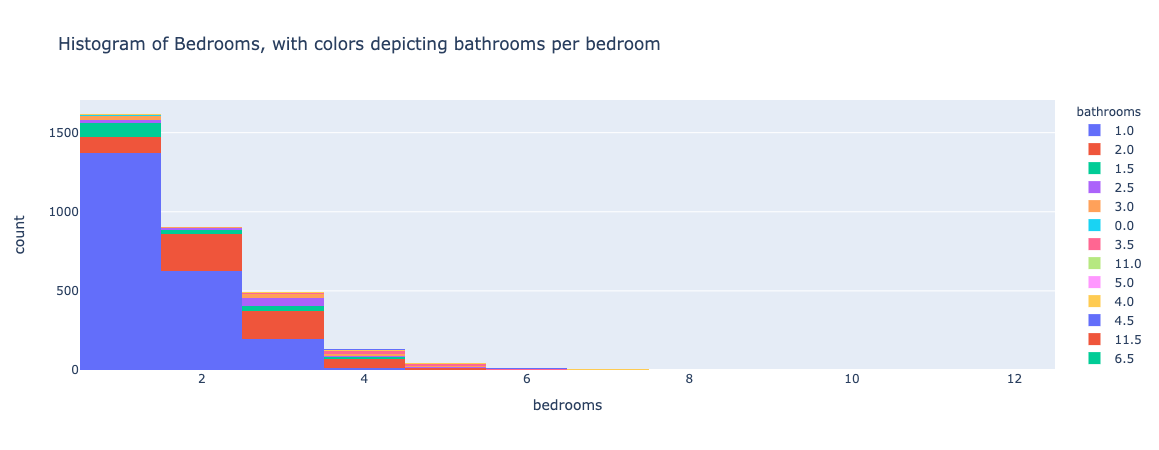

In [13]:
fig = px.histogram(df_Chi_Airbnb,x='bedrooms', color='bathrooms', title='Histogram of Bedrooms, with colors depicting bathrooms per bedroom')
fig.show()

**This displays a map of the airbnbs in chicago by review score. This gives greater insight on where the best Airbnbs are in Chicago.**

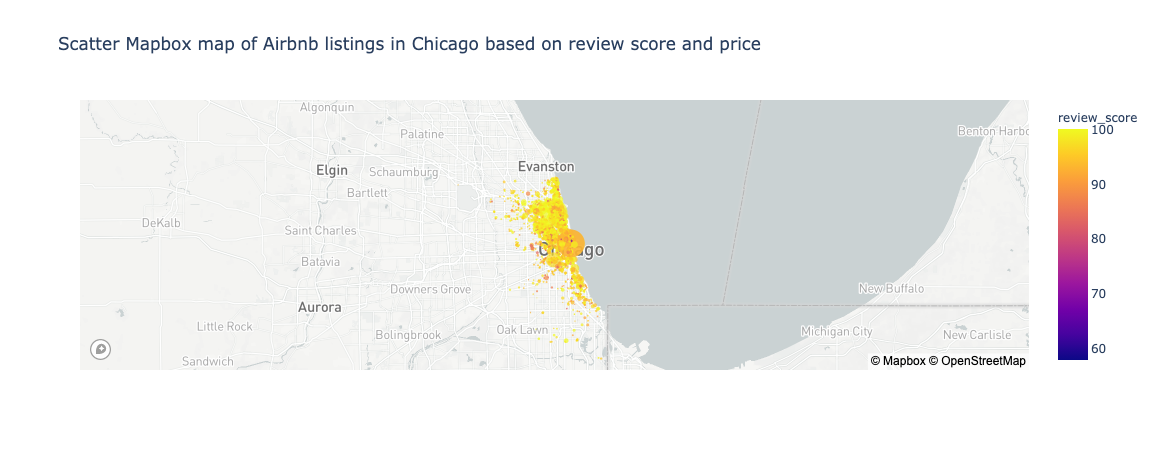

In [14]:
px.set_mapbox_access_token('pk.eyJ1IjoiY2hhb2NoYXBzIiwiYSI6ImNrb294a3h4azA0Nm0ycHBvdWMxb3J0aHIifQ.U9RoeMq8mInbCXB70RxmlQ')
fig = px.scatter_mapbox(df_Chi_Airbnb,lat='latitude',lon='longitude', color='review_score', size='price', title='Scatter Mapbox map of Airbnb listings in Chicago based on review score and price')
fig.show()